# Task 5 -Sales prediction using python

In [1]:
# Importing lobraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the dataset

sales= pd.read_csv("Advertising.csv")
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Preliminary Analysis


In [3]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
#droppping the column unnamed as has no information.
sales.drop(columns=["Unnamed: 0"], inplace= True)
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Visualizing the columns wrt sales using joint plot


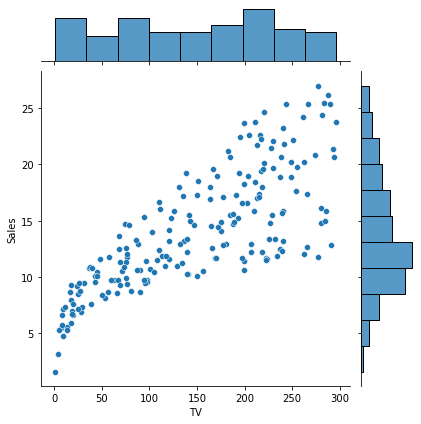

In [8]:
sns.jointplot(x='TV',y='Sales',data= sales)

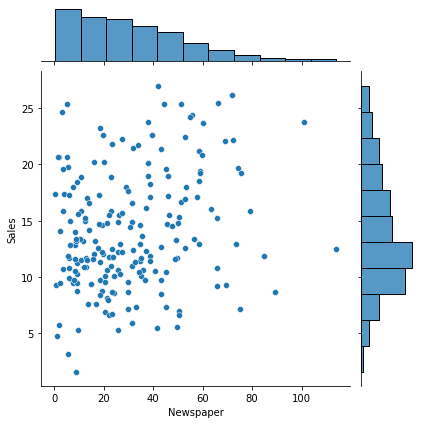

In [9]:
sns.jointplot(x='Newspaper',y='Sales',data= sales)

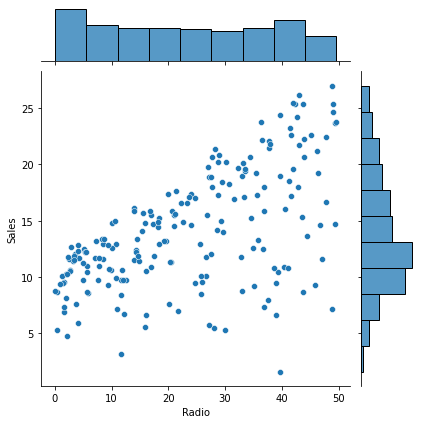

In [10]:
sns.jointplot(x='Radio',y='Sales',data= sales)

# Preparing the test and train data

In [11]:

#Training and Testing data

X = sales[['TV', 'Radio', 'Newspaper']]
y = sales[['Sales']]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print("Train dataset shape is", X_train.shape)
print("Test dataset shape is", X_test.shape)



Train dataset shape is (140, 3)
Test dataset shape is (60, 3)


In [12]:
print("Train dataset shape is", y_train.shape)
print("Test dataset shape is", y_test.shape)

Train dataset shape is (140, 1)
Test dataset shape is (60, 1)


In [13]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [14]:
mlr.coef_

array([[0.0454256 , 0.18975773, 0.00460308]])

In [15]:
#Predicting the test data
predictions = mlr.predict(X_test)

Text(0, 0.5, 'predictions')

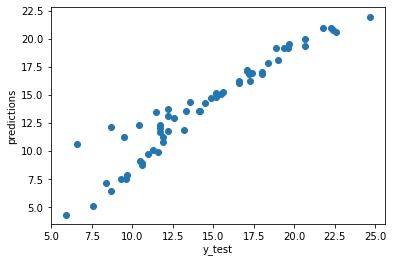

In [16]:
#create a scatterplot to test the actuals with the predictions
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [17]:
from sklearn import metrics
print('MSE :-'," ",metrics.mean_squared_error(y_test,predictions))



MSE :-   1.8506819941636945


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print(r2)

0.9058622107532246
